In [1]:
import sys
sys.path.append('../../')
from helper import *

import numpy as np
import matplotlib.pyplot as plt

In [8]:
def mse_loss(dataset_X, dataset_Y, w, f):
    y_pred = f(dataset_X, w)
    mse = np.mean((dataset_Y - y_pred) ** 2)
    return mse

In [21]:
def f(x, w):
    return_value = np.sin(w[0] * x + w[1])
    return return_value

density = 8000
dots_count = 1000
variance = 0.1
dist = 2.5
weights = np.array([2, 3], dtype=float)


gen = Generator(f)
X, Y, Dataset_X, Dataset_Y = gen.generate(dots_count, dist, density, variance, weights)

init_dist = 10
init_density = 1000
init_x = np.linspace(weights[0]-init_dist, weights[0]+init_dist, init_density)
init_y = np.linspace(weights[1]-init_dist, weights[1]+init_dist, init_density)
init_X, init_Y = np.meshgrid(init_x, init_y)

# ======================================================================================

# Определение функции, принимающей значения float для x и y
def my_function(x, y):
    return mse_loss(Dataset_X, Dataset_Y, np.array([x, y], dtype=float), f)

# Создаем векторизованную версию функции
vectorized_func = np.vectorize(my_function)

init_Z = vectorized_func(init_X, init_Y)
# ======================================================================================

(1000, 1000)


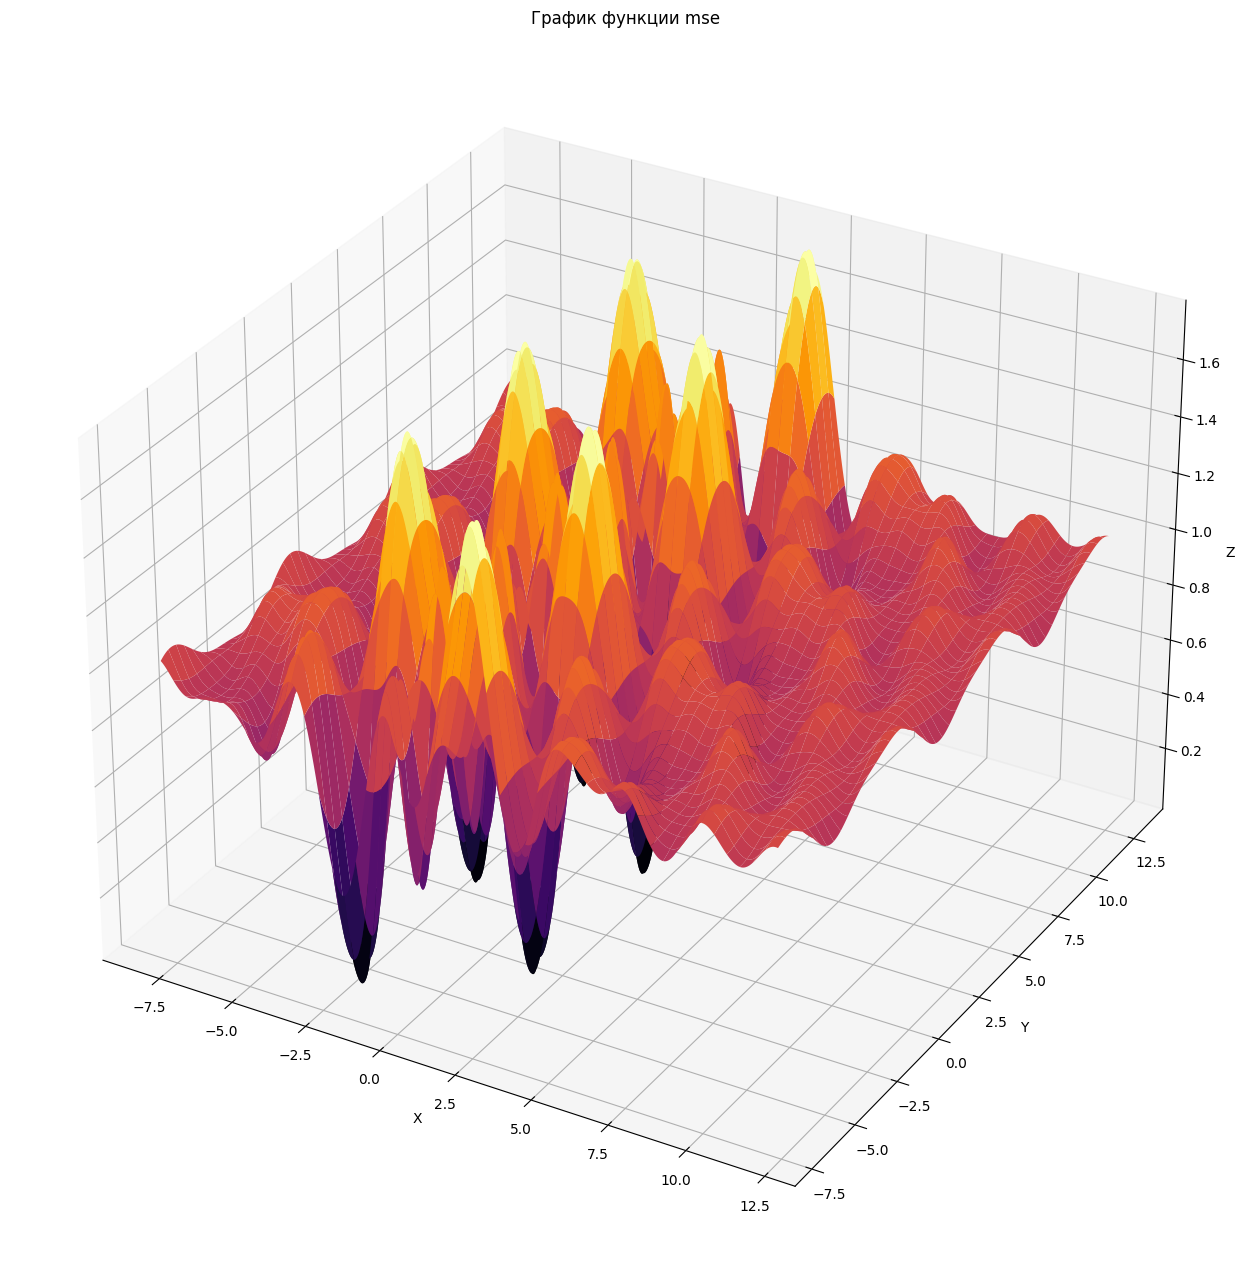

In [41]:
print(init_Z.shape)

# Создаем трехмерную фигуру и оси
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(init_X, init_Y, init_Z, cmap='inferno', edgecolor='none')

# Настройка меток и заголовка
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('График функции mse')

# Отображение графика
plt.show()